In [68]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import brown
from itertools import chain
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.models import Model
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer

nltk.download('wordnet')
nltk.download('brown')
nltk.download('universal_tagset')

sentences = brown.tagged_sents(tagset='universal')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [69]:
words = []
tags  = []

for sentence in sentences:
    new_sentence = []
    new_tag      = []
    for word in sentence:
        new_sentence.append(word[0])
        new_tag.append(word[1])
    words.append(new_sentence)
    tags.append(new_tag)

In [70]:
TEST_SIZE = 0.15
X_train_words, X_test_words, Y_train_tags, Y_test_tags = train_test_split(words, tags, test_size=TEST_SIZE, random_state=4)

In [71]:
word_tokenizer = Tokenizer(oov_token=True)                                # instantiate tokeniser
tag_tokenizer = Tokenizer()

word_tokenizer.fit_on_texts(X_train_words)                                # fit tokenisers on data
tag_tokenizer.fit_on_texts(Y_train_tags)

train_words_encoded = word_tokenizer.texts_to_sequences(X_train_words)          # use the tokeniser to encode input sequtag_tokenizer = Tokenizer()
train_tags_encoded = tag_tokenizer.texts_to_sequences(Y_train_tags)

print(word_tokenizer.word_index)
print(tag_tokenizer.word_index)

{True: 1, 'the': 2, ',': 3, '.': 4, 'of': 5, 'and': 6, 'to': 7, 'a': 8, 'in': 9, 'that': 10, 'is': 11, 'was': 12, 'he': 13, 'for': 14, '``': 15, "''": 16, 'it': 17, 'with': 18, 'as': 19, 'his': 20, 'on': 21, 'be': 22, ';': 23, 'at': 24, 'by': 25, 'i': 26, 'this': 27, 'had': 28, '?': 29, 'not': 30, 'are': 31, 'but': 32, 'from': 33, 'or': 34, 'have': 35, 'an': 36, 'they': 37, 'which': 38, '--': 39, 'one': 40, 'were': 41, 'you': 42, 'her': 43, 'all': 44, 'she': 45, 'would': 46, 'there': 47, 'we': 48, 'him': 49, 'their': 50, ')': 51, '(': 52, 'been': 53, 'has': 54, 'when': 55, 'who': 56, 'will': 57, 'more': 58, 'if': 59, 'no': 60, 'out': 61, 'so': 62, 'said': 63, 'what': 64, 'up': 65, 'its': 66, 'about': 67, ':': 68, 'than': 69, 'into': 70, 'them': 71, 'can': 72, 'only': 73, 'other': 74, 'new': 75, '!': 76, 'some': 77, 'could': 78, 'time': 79, 'these': 80, 'two': 81, 'may': 82, 'then': 83, 'first': 84, 'do': 85, 'my': 86, 'any': 87, 'now': 88, 'like': 89, 'such': 90, 'our': 91, 'over': 92,

In [72]:
maxIndex = max([max(x) for x in train_words_encoded])
cap = int(0.7*maxIndex)
for i in range(len(train_words_encoded)):
    for j in range(len(train_words_encoded[i])):
        if (train_words_encoded[i][j] >= cap):
            train_words_encoded[i][j] = 1

In [97]:
nGramCounts = np.zeros((15, 15, 15, 15, 12))
for i in range(len(train_words_encoded)):
    sl = len(train_words_encoded[i])     #Sentence length
    for j in range(sl):
        i1 = 0
        i2 = 0
        i3 = 0
        i4 = 0
        if (j == 0):
            i4 = 13
            i3 = 13
        if (j == 1):
            i4 = 13
        if (j == sl - 2):
            i1 = 14
            i2 = 14
        if (j == sl - 1):
            i1 = 14
        if (j >= 2):
            if (train_words_encoded[i][j-2] == 1):
                i4 = 0
            else:
                i4 = train_tags_encoded[i][j-2]
        if (j >= 1):
            if (train_words_encoded[i][j-1] == 1):
                i3 = 0
            else:
                i3 = train_tags_encoded[i][j-1]
        if (j <= sl-3):
            if (train_words_encoded[i][j+2] == 1):
                i4 = 0
            else:
                i4 = train_tags_encoded[i][j+2]
        if (j <= sl-2):
            if (train_words_encoded[i][j+1] == 1):
                i3 = 0
            else:
                i3 = train_tags_encoded[i][j+1]
        i5 = train_tags_encoded[i][j] - 1
        nGramCounts[i1][i2][i3][i4][i5] += 1

nGramCounts = np.argmax(nGramCounts, axis = -1) + 1

In [74]:
MAX_SEQ_LENGTH = 30
EMBEDDING_SIZE  = 100
VOCABULARY_SIZE = len(word_tokenizer.word_index) + 1
print(VOCABULARY_SIZE)

46275


In [77]:
train_words_encoded_padded = pad_sequences(train_words_encoded, maxlen=MAX_SEQ_LENGTH, padding="post", truncating = "post")
train_tags_encoded_padded = pad_sequences(train_tags_encoded, maxlen=MAX_SEQ_LENGTH, padding="post", truncating = "post")

print(train_words_encoded_padded[0])
print(train_tags_encoded_padded[0])

[   32     3    13   370     3   580     5  1690    19    36    15   476
     5  2473    16     3    17   104  1716     3   104   126     8   173
    14     2  3564     5     2 25451]
[9 3 8 2 3 7 4 2 4 5 3 1 4 1 3 3 8 2 2 3 2 2 5 1 4 5 1 4 5 1]


In [78]:
train_tags_encoded_categorical = to_categorical(train_tags_encoded_padded)

train_tags_encoded_categorical = np.array(train_tags_encoded_categorical)
train_words_encoded_padded       = np.array(train_words_encoded_padded)
print(train_words_encoded_padded.shape, train_tags_encoded_categorical.shape)

(48739, 30) (48739, 30, 13)


In [79]:
model = Sequential()
model.add(Embedding(VOCABULARY_SIZE, EMBEDDING_SIZE, input_length=MAX_SEQ_LENGTH))

model.add(Dense(128, input_dim = EMBEDDING_SIZE, activation = 'relu')) # Rectified Linear Unit Activation Function
#model.add(Dense(64, activation = 'relu'))
model.add(Dense(13, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 100)           4627500   
                                                                 
 dense_4 (Dense)             (None, 30, 128)           12928     
                                                                 
 dense_5 (Dense)             (None, 30, 13)            1677      
                                                                 
Total params: 4,642,105
Trainable params: 4,642,105
Non-trainable params: 0
_________________________________________________________________


In [80]:
'''
Function for caculating F-Score given precision and recall
'''
def FScore(precision, recall, beta):
    fscore = ((1+beta*beta)*precision*recall)/(beta*beta*precision + recall)
    return fscore

In [81]:
mapIndexToTags = {}
tagCount = 0
for i in tag_tokenizer.word_index:
    mapIndexToTags[tag_tokenizer.word_index[i]] = i
    tagCount += 1
uniqueTags = list(tag_tokenizer.word_index.keys())
print(uniqueTags)

['noun', 'verb', '.', 'adp', 'det', 'adj', 'adv', 'pron', 'conj', 'prt', 'num', 'x']


In [82]:
def getMetrics(prediction, trueTags):
    confusionMatrix = np.zeros((tagCount, tagCount))
    numSentences = prediction.shape[0]
    sentenceLen = prediction.shape[1]

    prediction = np.argmax(prediction, axis = -1)
    trueTags = np.argmax(trueTags, axis = -1)
    for i in range(numSentences):
        for j in range(sentenceLen):
            if (prediction[i][j] == 0):
                break
            confusionMatrix[int(trueTags[i][j])-1][int(prediction[i][j])-1] += 1
    df_cm = pd.DataFrame(confusionMatrix, index = uniqueTags, columns = uniqueTags)
    display(df_cm)
    plt.figure(figsize = (15,10))
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12})
    plt.show()
    
    testTagsCount = np.sum(confusionMatrix, axis = 1)
    totalTestTags = np.sum(confusionMatrix)

    TP = np.zeros(tagCount)
    FP = np.zeros(tagCount)
    FN = np.zeros(tagCount)
    for j in range(tagCount):
        TP[j] = confusionMatrix[j][j]
        FN[j] = np.sum(confusionMatrix[j]) - TP[j]
        FP[j] = np.sum(confusionMatrix[:, j]) - TP[j]
    
    '''
    Calculating metrics for each fold
    '''
    precision = (TP/(TP + FP))
    recall = (TP/(TP + FN))
    f1Score = FScore(precision, recall, 1.0)
    f05Score = FScore(precision, recall, 0.5)
    f2Score = FScore(precision, recall, 2)

    '''
    Calculating weighted metrics for each fold
    '''
    weightedprecision = np.sum(precision*testTagsCount)/totalTestTags
    weightedrecall = np.sum(recall*testTagsCount)/totalTestTags
    weightedf1Score = np.sum(f1Score*testTagsCount)/totalTestTags
    weightedf05Score = np.sum(f05Score*testTagsCount)/totalTestTags
    weightedf2Score = np.sum(f2Score*testTagsCount)/totalTestTags

    return (confusionMatrix, precision, recall, f1Score, f05Score, f2Score, weightedprecision, weightedrecall, weightedf1Score, weightedf05Score, weightedf2Score)
    

In [83]:
Precision = np.zeros((5, tagCount))
Recall = np.zeros((5, tagCount))
F1Score = np.zeros((5, tagCount))
F05Score = np.zeros((5, tagCount))
F2Score = np.zeros((5, tagCount))
ConfusionMatrix = np.zeros((5, tagCount, tagCount))

'''
Weighted metric values for each fold
'''
weightedPrecision = np.zeros(5)
weightedRecall = np.zeros(5)
weightedF1Score = np.zeros(5)
weightedF05Score = np.zeros(5)
weightedF2Score = np.zeros(5)

Epoch 1/5
305/305 [==============================] - 3s 7ms/step - loss: 0.1692 - accuracy: 0.7290 - val_loss: 0.0277 - val_accuracy: 0.9497
Epoch 2/5
305/305 [==============================] - 2s 6ms/step - loss: 0.0175 - accuracy: 0.9612 - val_loss: 0.0157 - val_accuracy: 0.9637
Epoch 3/5
305/305 [==============================] - 2s 6ms/step - loss: 0.0128 - accuracy: 0.9672 - val_loss: 0.0143 - val_accuracy: 0.9646
Epoch 4/5
305/305 [==============================] - 2s 7ms/step - loss: 0.0119 - accuracy: 0.9677 - val_loss: 0.0139 - val_accuracy: 0.9643
Epoch 5/5
305/305 [==============================] - 2s 7ms/step - loss: 0.0116 - accuracy: 0.9678 - val_loss: 0.0136 - val_accuracy: 0.9646


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
noun,40346.0,953.0,0.0,23.0,17.0,668.0,35.0,2.0,0.0,7.0,74.0,5.0
verb,1832.0,26477.0,0.0,54.0,0.0,125.0,14.0,0.0,0.0,0.0,0.0,1.0
.,0.0,0.0,21891.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adp,14.0,10.0,2.0,19999.0,0.0,6.0,181.0,0.0,21.0,1829.0,0.0,0.0
det,1.0,0.0,0.0,394.0,20922.0,0.0,0.0,2.0,21.0,0.0,0.0,0.0
adj,1031.0,84.0,0.0,18.0,0.0,11200.0,394.0,0.0,0.0,1.0,0.0,0.0
adv,163.0,6.0,0.0,458.0,72.0,484.0,7410.0,0.0,13.0,132.0,0.0,0.0
pron,8.0,0.0,0.0,266.0,179.0,0.0,0.0,7398.0,0.0,2.0,0.0,0.0
conj,0.0,0.0,0.0,1.0,1.0,0.0,23.0,0.0,5760.0,0.0,0.0,0.0
prt,43.0,12.0,0.0,226.0,0.0,55.0,32.0,0.0,0.0,4247.0,0.0,0.0


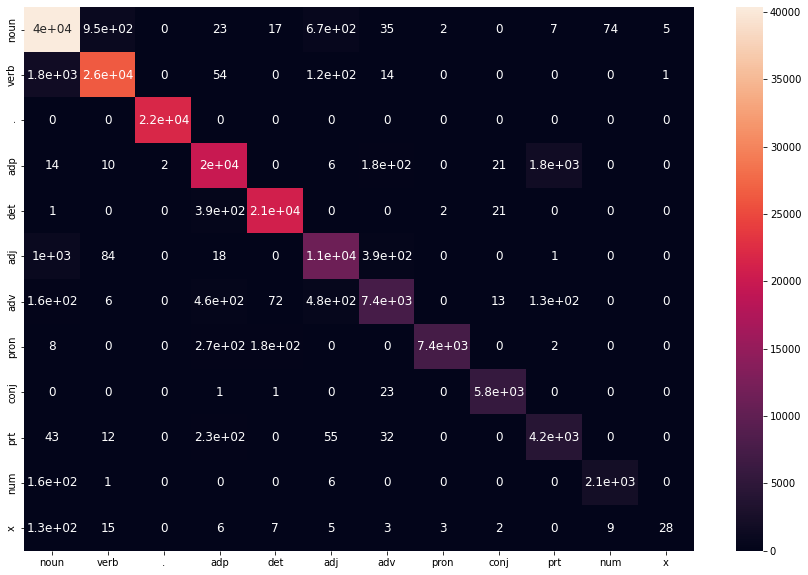

Epoch 1/5
305/305 [==============================] - 2s 7ms/step - loss: 0.0122 - accuracy: 0.9667 - val_loss: 0.0105 - val_accuracy: 0.9702
Epoch 2/5
305/305 [==============================] - 2s 6ms/step - loss: 0.0114 - accuracy: 0.9684 - val_loss: 0.0106 - val_accuracy: 0.9703
Epoch 3/5
305/305 [==============================] - 2s 7ms/step - loss: 0.0113 - accuracy: 0.9684 - val_loss: 0.0107 - val_accuracy: 0.9700
Epoch 4/5
305/305 [==============================] - 2s 7ms/step - loss: 0.0112 - accuracy: 0.9685 - val_loss: 0.0107 - val_accuracy: 0.9704
Epoch 5/5
305/305 [==============================] - 2s 7ms/step - loss: 0.0111 - accuracy: 0.9684 - val_loss: 0.0107 - val_accuracy: 0.9704


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
noun,40262.0,763.0,0.0,14.0,18.0,511.0,45.0,5.0,1.0,9.0,88.0,6.0
verb,1400.0,26742.0,0.0,31.0,0.0,98.0,21.0,0.0,0.0,2.0,0.0,0.0
.,0.0,0.0,21853.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adp,26.0,6.0,2.0,19915.0,0.0,13.0,122.0,0.0,23.0,1833.0,0.0,0.0
det,1.0,0.0,0.0,345.0,20466.0,0.0,0.0,2.0,11.0,0.0,0.0,0.0
adj,577.0,67.0,0.0,22.0,0.0,11500.0,431.0,0.0,0.0,0.0,2.0,1.0
adv,40.0,1.0,0.0,460.0,55.0,484.0,7478.0,1.0,15.0,116.0,0.0,0.0
pron,1.0,0.0,0.0,298.0,182.0,0.0,0.0,7243.0,0.0,1.0,0.0,0.0
conj,0.0,0.0,0.0,1.0,3.0,0.0,13.0,0.0,5741.0,0.0,0.0,0.0
prt,21.0,6.0,0.0,223.0,1.0,58.0,33.0,1.0,0.0,4138.0,0.0,0.0


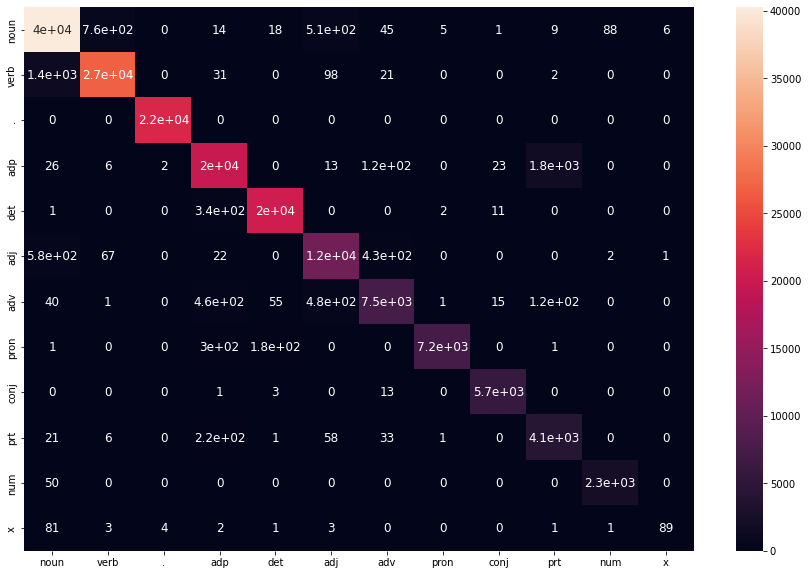

Epoch 1/5
305/305 [==============================] - 2s 7ms/step - loss: 0.0109 - accuracy: 0.9693 - val_loss: 0.0116 - val_accuracy: 0.9673
Epoch 2/5
305/305 [==============================] - 2s 7ms/step - loss: 0.0108 - accuracy: 0.9694 - val_loss: 0.0117 - val_accuracy: 0.9670
Epoch 3/5
305/305 [==============================] - 2s 7ms/step - loss: 0.0107 - accuracy: 0.9694 - val_loss: 0.0118 - val_accuracy: 0.9672
Epoch 4/5
305/305 [==============================] - 2s 7ms/step - loss: 0.0107 - accuracy: 0.9696 - val_loss: 0.0118 - val_accuracy: 0.9671
Epoch 5/5
305/305 [==============================] - 2s 6ms/step - loss: 0.0107 - accuracy: 0.9694 - val_loss: 0.0119 - val_accuracy: 0.9671


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
noun,39767.0,768.0,0.0,18.0,21.0,454.0,70.0,2.0,0.0,12.0,82.0,9.0
verb,1798.0,26237.0,0.0,39.0,0.0,96.0,15.0,0.0,0.0,1.0,0.0,2.0
.,0.0,0.0,21424.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adp,13.0,10.0,6.0,19562.0,0.0,14.0,153.0,0.0,20.0,1794.0,0.0,0.0
det,2.0,0.0,0.0,359.0,20337.0,0.0,0.0,3.0,14.0,0.0,1.0,0.0
adj,913.0,58.0,0.0,21.0,0.0,11257.0,443.0,0.0,0.0,2.0,0.0,0.0
adv,117.0,0.0,0.0,422.0,48.0,525.0,7466.0,0.0,12.0,131.0,0.0,0.0
pron,3.0,0.0,0.0,273.0,212.0,0.0,1.0,7229.0,0.0,4.0,0.0,0.0
conj,0.0,0.0,0.0,0.0,4.0,0.0,23.0,0.0,5582.0,0.0,0.0,0.0
prt,41.0,4.0,0.0,238.0,0.0,54.0,31.0,0.0,0.0,4321.0,0.0,0.0


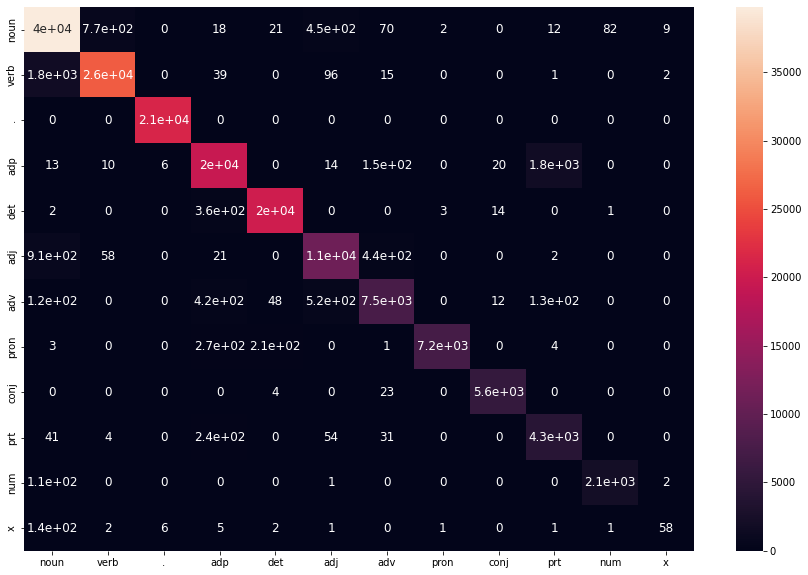

Epoch 1/5
305/305 [==============================] - 2s 7ms/step - loss: 0.0107 - accuracy: 0.9694 - val_loss: 0.0115 - val_accuracy: 0.9673
Epoch 2/5
305/305 [==============================] - 2s 7ms/step - loss: 0.0107 - accuracy: 0.9696 - val_loss: 0.0116 - val_accuracy: 0.9672
Epoch 3/5
305/305 [==============================] - 2s 7ms/step - loss: 0.0106 - accuracy: 0.9695 - val_loss: 0.0117 - val_accuracy: 0.9672
Epoch 4/5
305/305 [==============================] - 2s 7ms/step - loss: 0.0106 - accuracy: 0.9696 - val_loss: 0.0118 - val_accuracy: 0.9671
Epoch 5/5
305/305 [==============================] - 2s 7ms/step - loss: 0.0106 - accuracy: 0.9696 - val_loss: 0.0118 - val_accuracy: 0.9671


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
noun,39956.0,945.0,1.0,24.0,12.0,501.0,40.0,3.0,0.0,10.0,82.0,14.0
verb,1664.0,26751.0,0.0,39.0,0.0,77.0,12.0,0.0,0.0,0.0,0.0,0.0
.,0.0,0.0,21582.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adp,9.0,2.0,1.0,19819.0,0.0,26.0,120.0,0.0,25.0,1834.0,0.0,0.0
det,1.0,0.0,0.0,352.0,20430.0,0.0,0.0,5.0,16.0,0.0,0.0,0.0
adj,940.0,59.0,0.0,23.0,0.0,10990.0,524.0,0.0,0.0,2.0,0.0,0.0
adv,130.0,1.0,0.0,481.0,61.0,375.0,7392.0,0.0,8.0,141.0,0.0,0.0
pron,8.0,0.0,0.0,265.0,186.0,0.0,0.0,7420.0,0.0,0.0,0.0,0.0
conj,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,5592.0,0.0,0.0,0.0
prt,29.0,4.0,0.0,219.0,0.0,48.0,29.0,0.0,0.0,4252.0,0.0,0.0


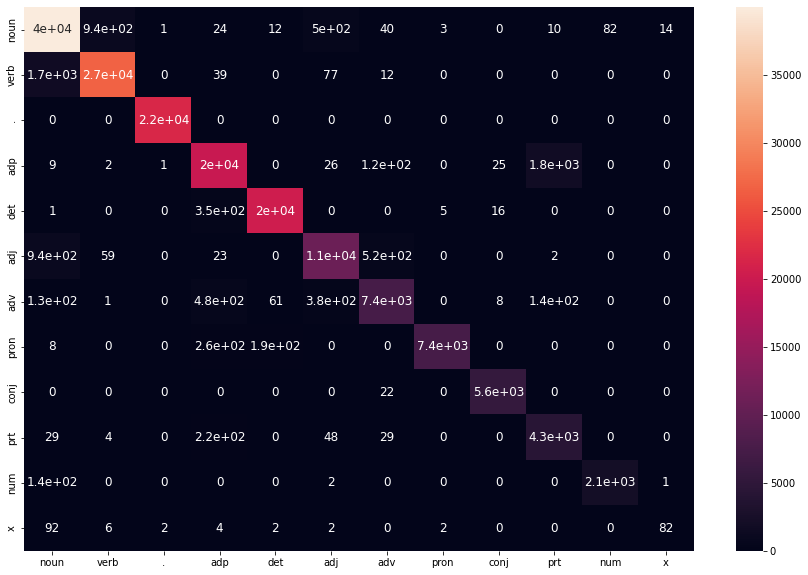

Epoch 1/5
305/305 [==============================] - 2s 7ms/step - loss: 0.0107 - accuracy: 0.9695 - val_loss: 0.0114 - val_accuracy: 0.9672
Epoch 2/5
305/305 [==============================] - 2s 7ms/step - loss: 0.0106 - accuracy: 0.9696 - val_loss: 0.0115 - val_accuracy: 0.9676
Epoch 3/5
305/305 [==============================] - 2s 7ms/step - loss: 0.0106 - accuracy: 0.9697 - val_loss: 0.0116 - val_accuracy: 0.9672
Epoch 4/5
305/305 [==============================] - 2s 7ms/step - loss: 0.0106 - accuracy: 0.9697 - val_loss: 0.0117 - val_accuracy: 0.9672
Epoch 5/5
305/305 [==============================] - 2s 7ms/step - loss: 0.0106 - accuracy: 0.9696 - val_loss: 0.0118 - val_accuracy: 0.9672


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
noun,40561.0,820.0,0.0,19.0,21.0,501.0,49.0,7.0,0.0,5.0,102.0,5.0
verb,1742.0,26818.0,0.0,31.0,0.0,77.0,20.0,0.0,0.0,1.0,0.0,2.0
.,0.0,0.0,21720.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adp,7.0,7.0,5.0,20078.0,0.0,26.0,131.0,0.0,26.0,1801.0,1.0,0.0
det,2.0,0.0,0.0,303.0,20845.0,0.0,0.0,1.0,12.0,1.0,1.0,0.0
adj,959.0,67.0,0.0,10.0,0.0,11271.0,294.0,0.0,0.0,4.0,2.0,0.0
adv,139.0,2.0,0.0,459.0,62.0,654.0,7189.0,0.0,6.0,131.0,0.0,0.0
pron,2.0,0.0,0.0,230.0,158.0,0.0,0.0,7388.0,0.0,0.0,0.0,0.0
conj,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,5777.0,0.0,0.0,0.0
prt,41.0,4.0,0.0,244.0,1.0,47.0,38.0,6.0,0.0,4236.0,0.0,1.0


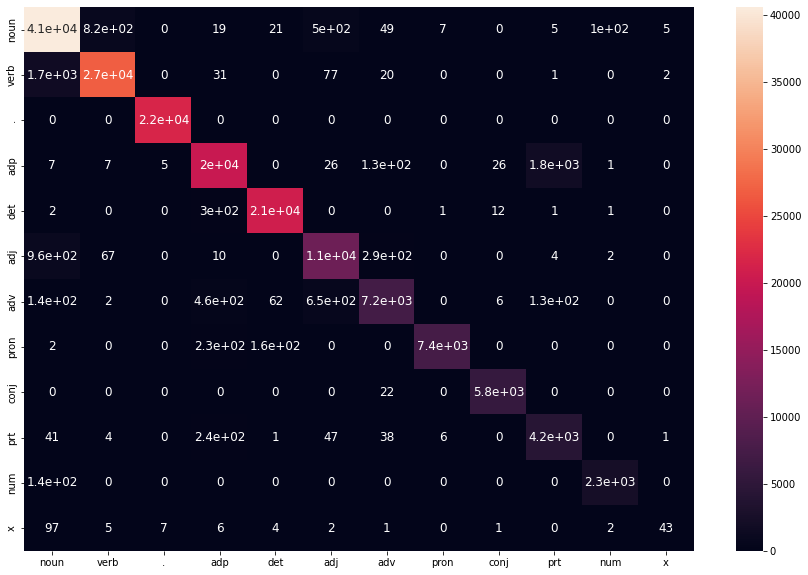

In [84]:
kf = KFold(n_splits=5)
kf.get_n_splits(train_words_encoded_padded)
fold = 0

for train_index, valid_index in kf.split(train_words_encoded_padded):
    X_train, X_valid = train_words_encoded_padded[train_index], train_words_encoded_padded[valid_index]
    Y_train, Y_valid = train_tags_encoded_categorical[train_index], train_tags_encoded_categorical[valid_index]

    model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs = 5, batch_size=128)
    prediction = model.predict(X_valid)
    ConfusionMatrix[fold], Precision[fold], Recall[fold], F1Score[fold], F05Score[fold], F2Score[fold], weightedPrecision[fold], weightedRecall[fold], weightedF1Score[fold], weightedF05Score[fold], weightedF2Score[fold] = getMetrics(prediction, Y_valid)
    fold += 1

Fold 1 :


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
Precision,0.963969,0.951303,1.0,0.908123,0.980459,0.952781,0.834974,0.943079,0.995678,0.927844,1.0,0.677725


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
Recall,0.962347,0.968013,0.999909,0.931774,0.986981,0.896967,0.935145,0.999056,0.990201,0.684463,0.968868,0.85119


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
F1-score,0.963157,0.959585,0.999954,0.919796,0.983709,0.924032,0.882225,0.970261,0.992932,0.787784,0.984188,0.754617


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
F0.5-score,0.963644,0.954599,0.999982,0.912756,0.981757,0.94107,0.853253,0.953767,0.994578,0.86624,0.993615,0.706522


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
F2-score,0.962671,0.964624,0.999927,0.926945,0.985669,0.907601,0.913233,0.987335,0.991292,0.722359,0.974939,0.80974


Confusion Matrix :


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
noun,40612.0,1212.0,0.0,5.0,0.0,311.0,10.0,0.0,0.0,16.0,0.0,35.0
verb,819.0,27115.0,0.0,9.0,0.0,46.0,0.0,0.0,0.0,11.0,0.0,11.0
.,0.0,0.0,21891.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adp,23.0,55.0,0.0,20035.0,394.0,15.0,481.0,266.0,1.0,226.0,0.0,6.0
det,17.0,0.0,0.0,0.0,20923.0,0.0,72.0,179.0,1.0,0.0,0.0,7.0
adj,488.0,108.0,0.0,13.0,0.0,12127.0,734.0,0.0,0.0,48.0,0.0,2.0
adv,62.0,12.0,0.0,148.0,0.0,227.0,7296.0,0.0,23.0,32.0,0.0,2.0
pron,2.0,0.0,0.0,0.0,2.0,0.0,0.0,7406.0,0.0,0.0,0.0,3.0
conj,0.0,0.0,0.0,21.0,21.0,0.0,13.0,0.0,5760.0,0.0,0.0,2.0
prt,9.0,0.0,0.0,1829.0,0.0,2.0,132.0,2.0,0.0,4282.0,0.0,0.0


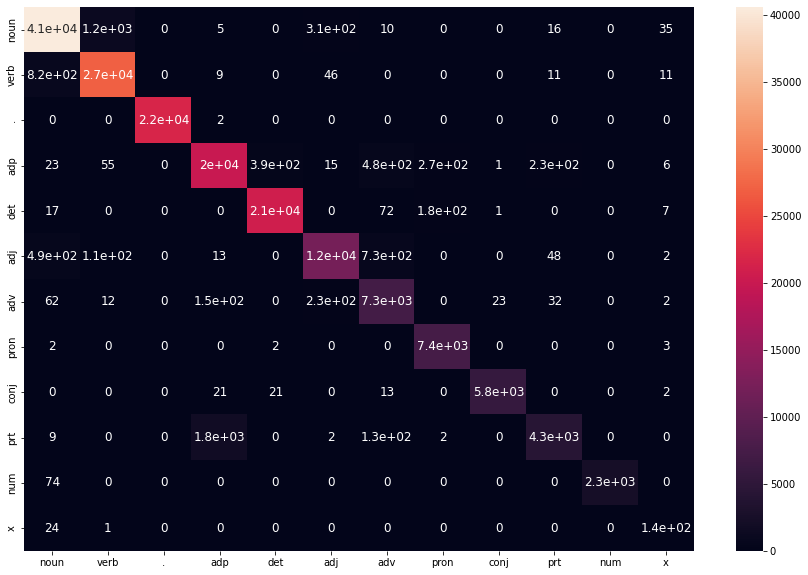

Weighted Precision : 0.9542376823604676
Weighted Recall : 0.9536032420478336
Weighted F1-score : 0.9530097957966241
Weighted F0.5-score : 0.9534895615030794
Weighted F2-score : 0.9531786004450321
Fold 2 :


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
Precision,0.964959,0.948646,1.0,0.907931,0.982761,0.913254,0.869133,0.937605,0.997048,0.923678,0.978885,0.659459


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
Recall,0.952043,0.969409,0.999726,0.934378,0.987455,0.913617,0.912933,0.998759,0.991366,0.678191,0.962625,0.890511


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
F1-score,0.958457,0.958915,0.999863,0.920964,0.985103,0.913435,0.890495,0.967216,0.994199,0.782124,0.970687,0.757764


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
F0.5-score,0.962347,0.952727,0.999945,0.9131,0.983696,0.913326,0.877553,0.949229,0.995906,0.861323,0.975589,0.695553


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
F2-score,0.954598,0.965184,0.99978,0.928966,0.986513,0.913544,0.903823,0.985898,0.992497,0.716263,0.965833,0.832196


Confusion Matrix :


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
noun,40260.0,1311.0,0.0,10.0,1.0,546.0,41.0,1.0,0.0,20.0,50.0,48.0
verb,771.0,26841.0,0.0,6.0,0.0,61.0,1.0,0.0,0.0,5.0,0.0,3.0
.,0.0,0.0,21853.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
adp,17.0,31.0,0.0,19920.0,345.0,22.0,460.0,298.0,1.0,223.0,0.0,2.0
det,18.0,0.0,0.0,0.0,20466.0,0.0,55.0,182.0,3.0,1.0,0.0,1.0
adj,469.0,89.0,0.0,25.0,0.0,11507.0,443.0,0.0,0.0,59.0,0.0,3.0
adv,69.0,20.0,0.0,121.0,0.0,461.0,7518.0,0.0,13.0,33.0,0.0,0.0
pron,5.0,0.0,0.0,0.0,2.0,0.0,1.0,7243.0,0.0,1.0,0.0,0.0
conj,1.0,0.0,0.0,23.0,11.0,0.0,15.0,0.0,5741.0,0.0,0.0,0.0
prt,11.0,2.0,0.0,1833.0,0.0,0.0,116.0,1.0,0.0,4139.0,0.0,1.0


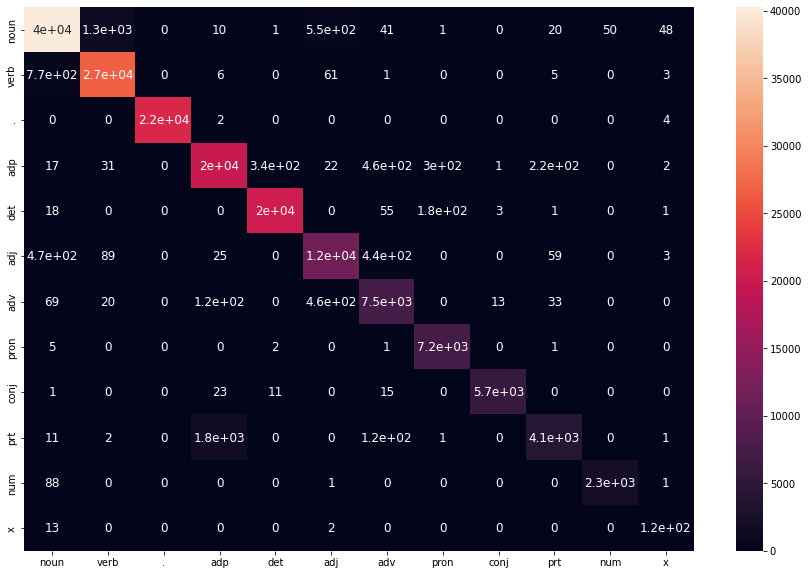

Weighted Precision : 0.9522283550152741
Weighted Recall : 0.9519673924750993
Weighted F1-score : 0.9513160126719497
Weighted F0.5-score : 0.9516351729630413
Weighted F2-score : 0.9515525226422773
Fold 3 :


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
Precision,0.965536,0.932241,1.0,0.908678,0.981705,0.899086,0.839353,0.936286,0.995186,0.921732,0.948387,0.256881


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
Recall,0.927797,0.969561,0.99944,0.933562,0.986084,0.898166,0.933316,0.999171,0.991827,0.689864,0.960784,0.848485


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
F1-score,0.946291,0.950534,0.99972,0.920952,0.98389,0.898626,0.883844,0.966707,0.993504,0.789118,0.954545,0.394366


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
F0.5-score,0.957745,0.939473,0.999888,0.913548,0.982578,0.898902,0.856601,0.948222,0.994513,0.863675,0.950841,0.298507


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
F2-score,0.935107,0.961859,0.999552,0.928477,0.985205,0.89835,0.912878,0.985927,0.992497,0.726411,0.958279,0.580913


Confusion Matrix :


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
noun,39783.0,1753.0,0.0,13.0,2.0,917.0,114.0,3.0,0.0,40.0,111.0,143.0
verb,756.0,26278.0,0.0,10.0,0.0,53.0,0.0,0.0,0.0,4.0,0.0,2.0
.,0.0,0.0,21424.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
adp,16.0,39.0,0.0,19602.0,359.0,20.0,445.0,273.0,0.0,238.0,0.0,5.0
det,21.0,0.0,0.0,0.0,20337.0,0.0,48.0,212.0,4.0,0.0,0.0,2.0
adj,476.0,97.0,0.0,14.0,0.0,11413.0,651.0,0.0,0.0,54.0,1.0,1.0
adv,49.0,18.0,0.0,113.0,0.0,289.0,7320.0,0.0,23.0,31.0,0.0,0.0
pron,2.0,0.0,0.0,0.0,3.0,0.0,0.0,7230.0,0.0,0.0,0.0,1.0
conj,0.0,0.0,0.0,20.0,14.0,0.0,12.0,0.0,5582.0,0.0,0.0,0.0
prt,10.0,1.0,0.0,1794.0,0.0,2.0,131.0,4.0,0.0,4322.0,0.0,1.0


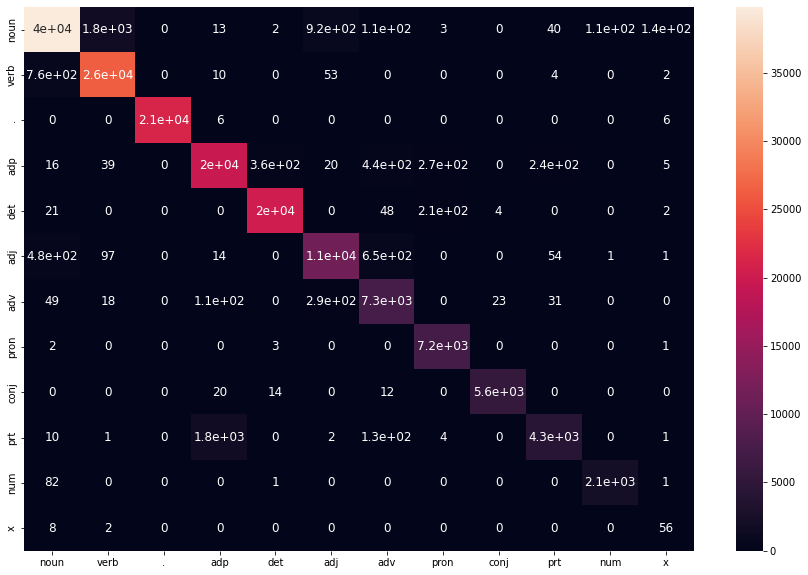

Weighted Precision : 0.9468953120288166
Weighted Recall : 0.9455712701370865
Weighted F1-score : 0.9452519565691112
Weighted F0.5-score : 0.9459781526167244
Weighted F2-score : 0.9452175952845192
Fold 4 :


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
Precision,0.965495,0.933539,1.0,0.907538,0.982023,0.879646,0.857143,0.942505,0.996081,0.9284,0.933757,0.427083


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
Recall,0.927664,0.968945,0.999815,0.933971,0.987386,0.917401,0.909563,0.998252,0.991314,0.681789,0.961233,0.854167


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
F1-score,0.946201,0.950913,0.999907,0.920565,0.984697,0.898127,0.882575,0.969578,0.993692,0.786209,0.947296,0.569444


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
F0.5-score,0.957684,0.940412,0.999963,0.912704,0.983091,0.886946,0.867138,0.953151,0.995124,0.865768,0.939126,0.474537


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
F2-score,0.934991,0.961651,0.999852,0.928562,0.986309,0.909593,0.898572,0.986582,0.992263,0.720042,0.955609,0.711806


Confusion Matrix :


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
noun,40153.0,1769.0,0.0,15.0,1.0,950.0,130.0,2.0,0.0,28.0,145.0,91.0
verb,788.0,26646.0,0.0,2.0,0.0,53.0,1.0,0.0,0.0,4.0,0.0,6.0
.,1.0,0.0,21582.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
adp,21.0,39.0,0.0,19817.0,352.0,16.0,485.0,265.0,0.0,219.0,0.0,4.0
det,12.0,0.0,0.0,0.0,20430.0,0.0,61.0,186.0,0.0,0.0,0.0,2.0
adj,435.0,77.0,0.0,29.0,0.0,11029.0,401.0,0.0,0.0,48.0,1.0,2.0
adv,68.0,12.0,0.0,113.0,0.0,488.0,7362.0,0.0,22.0,29.0,0.0,0.0
pron,6.0,0.0,0.0,0.0,5.0,0.0,0.0,7426.0,0.0,0.0,0.0,2.0
conj,0.0,0.0,0.0,25.0,16.0,0.0,8.0,0.0,5592.0,0.0,0.0,0.0
prt,8.0,0.0,0.0,1834.0,0.0,2.0,141.0,0.0,0.0,4253.0,0.0,0.0


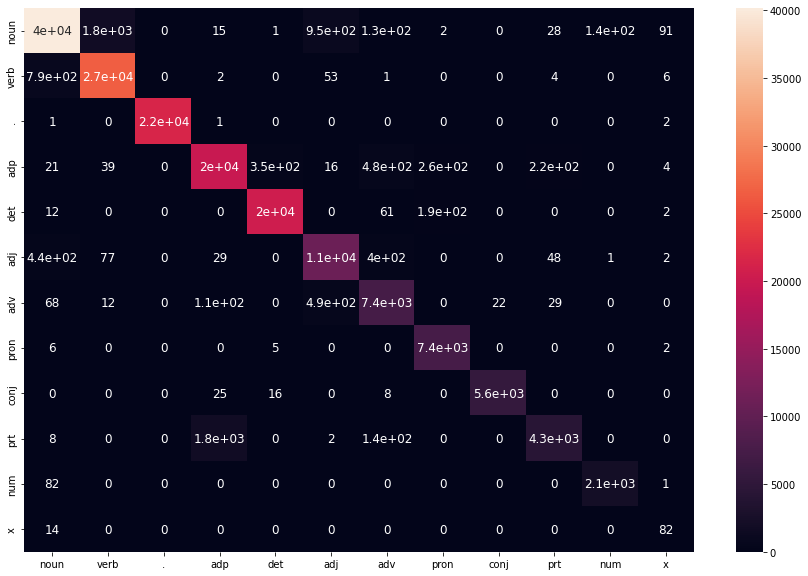

Weighted Precision : 0.9468514463517399
Weighted Recall : 0.9458937198067633
Weighted F1-score : 0.945396661242474
Weighted F0.5-score : 0.9459968565310567
Weighted F2-score : 0.9454896991279097
Fold 5 :


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
Precision,0.964267,0.935032,1.0,0.910379,0.984881,0.883874,0.851886,0.949859,0.996206,0.91728,0.940447,0.327381


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
Recall,0.92906,0.968729,0.999448,0.937509,0.988336,0.908817,0.918528,0.998109,0.992271,0.685437,0.95466,0.763889


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
F1-score,0.946336,0.951582,0.999724,0.923745,0.986605,0.896172,0.883953,0.973386,0.994235,0.78459,0.9475,0.458333


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
F0.5-score,0.957014,0.941582,0.99989,0.915679,0.98557,0.888752,0.864429,0.959132,0.995417,0.85916,0.943255,0.369624


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
F2-score,0.935894,0.961796,0.999558,0.931954,0.987643,0.903716,0.904378,0.98807,0.993055,0.721931,0.951783,0.60307


Confusion Matrix :


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
noun,40586.0,1724.0,0.0,6.0,2.0,956.0,139.0,2.0,0.0,41.0,144.0,85.0
verb,792.0,26827.0,0.0,6.0,0.0,57.0,2.0,0.0,0.0,4.0,0.0,5.0
.,0.0,0.0,21720.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
adp,27.0,32.0,0.0,20103.0,303.0,23.0,475.0,230.0,0.0,244.0,0.0,6.0
det,21.0,0.0,0.0,0.0,20845.0,0.0,62.0,158.0,0.0,1.0,0.0,4.0
adj,494.0,85.0,0.0,26.0,0.0,11143.0,465.0,0.0,0.0,47.0,0.0,1.0
adv,41.0,20.0,0.0,108.0,0.0,422.0,7362.0,0.0,22.0,38.0,0.0,2.0
pron,7.0,0.0,0.0,0.0,1.0,0.0,0.0,7388.0,0.0,6.0,0.0,0.0
conj,0.0,0.0,0.0,26.0,12.0,0.0,6.0,0.0,5777.0,0.0,0.0,1.0
prt,6.0,1.0,0.0,1801.0,1.0,4.0,131.0,0.0,0.0,4236.0,0.0,0.0


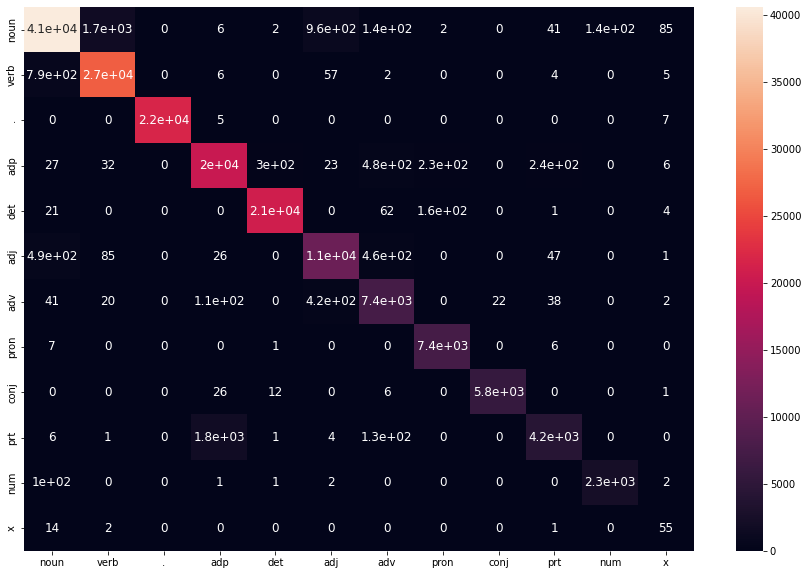

Weighted Precision : 0.9476512862714055
Weighted Recall : 0.9467763165296044
Weighted F1-score : 0.9463500042504042
Weighted F0.5-score : 0.9468933478874276
Weighted F2-score : 0.9464200979549274


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
Average Precision,0.964845,0.940152,1.0,0.90853,0.982366,0.905728,0.850498,0.941867,0.99604,0.923787,0.960295,0.469706


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
Average Recall,0.939782,0.968931,0.999667,0.934239,0.987248,0.906994,0.921897,0.998669,0.991396,0.683949,0.961634,0.841648


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
Average F1-score,0.952089,0.954306,0.999834,0.921204,0.984801,0.906078,0.884618,0.96943,0.993712,0.785965,0.960843,0.586905


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
Average F0.5-score,0.959687,0.945759,0.999933,0.913557,0.983338,0.905799,0.863795,0.9527,0.995107,0.863233,0.960485,0.508949


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
Average F2-score,0.944652,0.963023,0.999734,0.928981,0.986268,0.906561,0.906577,0.986762,0.992321,0.721401,0.961289,0.707545


Confusion Matrix :


,noun,verb,.,adp,det,adj,adv,pron,conj,prt,num,x
noun,201394.0,7769.0,0.0,49.0,6.0,3680.0,434.0,8.0,0.0,145.0,450.0,402.0
verb,3926.0,133707.0,0.0,33.0,0.0,270.0,4.0,0.0,0.0,28.0,0.0,27.0
.,1.0,0.0,108470.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
adp,104.0,196.0,0.0,99477.0,1753.0,96.0,2346.0,1332.0,2.0,1150.0,0.0,23.0
det,89.0,0.0,0.0,0.0,103001.0,0.0,298.0,917.0,8.0,2.0,0.0,16.0
adj,2362.0,456.0,0.0,107.0,0.0,57219.0,2694.0,0.0,0.0,256.0,2.0,9.0
adv,289.0,82.0,0.0,603.0,0.0,1887.0,36858.0,0.0,103.0,163.0,0.0,4.0
pron,22.0,0.0,0.0,0.0,13.0,0.0,1.0,36693.0,0.0,7.0,0.0,6.0
conj,1.0,0.0,0.0,115.0,74.0,0.0,54.0,0.0,28452.0,0.0,0.0,3.0
prt,44.0,4.0,0.0,9091.0,1.0,10.0,651.0,7.0,0.0,21232.0,0.0,2.0


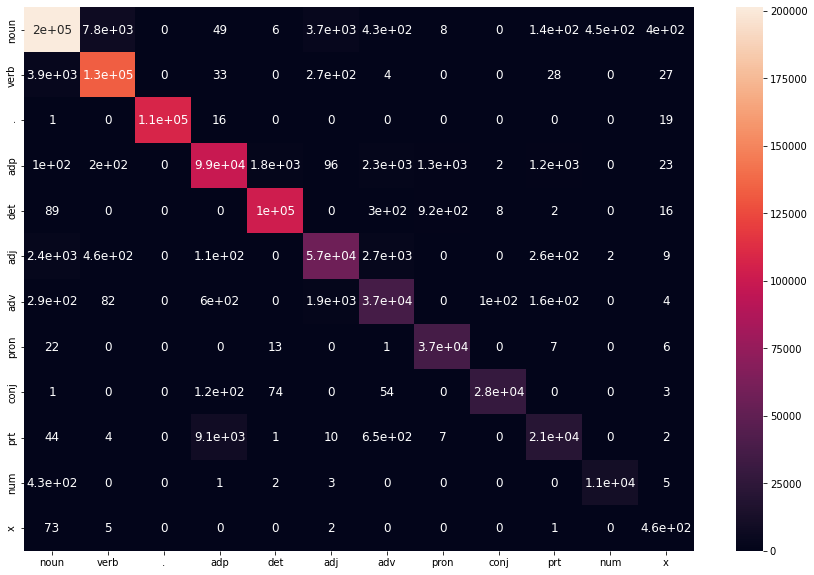

Overall average Precision : 0.9495728164055407
Overall average Recall : 0.9487623881992775
Overall average F1-score : 0.9482648861061127
Overall average F0.5-score : 0.9487986183002659
Overall average F2-score : 0.9483717030909331


In [24]:
for i in range(5):
    print("Fold", i+1, ":")
    display(pd.DataFrame(Precision[i].reshape((1, tagCount)), index = ["Precision"], columns = uniqueTags))

    display(pd.DataFrame(Recall[i].reshape(1, tagCount), index = ["Recall"], columns = uniqueTags))

    display(pd.DataFrame(F1Score[i].reshape(1, tagCount), index = ["F1-score"], columns = uniqueTags))

    display(pd.DataFrame(F05Score[i].reshape(1, tagCount), index = ["F0.5-score"], columns = uniqueTags))

    display(pd.DataFrame(F2Score[i].reshape(1, tagCount), index = ["F2-score"], columns = uniqueTags))

    print("Confusion Matrix :")
    df_cm = pd.DataFrame(ConfusionMatrix[i], index = uniqueTags, columns = uniqueTags)
    display(df_cm)
    plt.figure(figsize = (15,10))
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12})
    plt.show()

    print("Weighted Precision :", weightedPrecision[i])
    print("Weighted Recall :", weightedRecall[i])
    print("Weighted F1-score :", weightedF1Score[i])
    print("Weighted F0.5-score :", weightedF05Score[i])
    print("Weighted F2-score :", weightedF2Score[i])

avgPrecision = np.sum(Precision, axis = 0)/5
avgRecall = np.sum(Recall, axis = 0)/5
avgF1Score = np.sum(F1Score, axis = 0)/5
avgF05Score = np.sum(F05Score, axis = 0)/5
avgF2Score = np.sum(F2Score, axis = 0)/5

avgConfusionMatrix = np.zeros((tagCount, tagCount))
for i in range(5):
    avgConfusionMatrix += ConfusionMatrix[i]

display(pd.DataFrame(avgPrecision.reshape((1, tagCount)), index = ["Average Precision"], columns = uniqueTags))

display(pd.DataFrame(avgRecall.reshape(1, tagCount), index = ["Average Recall"], columns = uniqueTags))

display(pd.DataFrame(avgF1Score.reshape(1, tagCount), index = ["Average F1-score"], columns = uniqueTags))

display(pd.DataFrame(avgF05Score.reshape(1, tagCount), index = ["Average F0.5-score"], columns = uniqueTags))

display(pd.DataFrame(avgF2Score.reshape(1, tagCount), index = ["Average F2-score"], columns = uniqueTags))

print("Confusion Matrix :")
df_cm = pd.DataFrame(avgConfusionMatrix, index = uniqueTags, columns = uniqueTags)
display(df_cm)
plt.figure(figsize = (15,10))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12})
plt.show()

print("Overall average Precision :", np.sum(weightedPrecision)/5)
print("Overall average Recall :", np.sum(weightedRecall)/5)
print("Overall average F1-score :", np.sum(weightedF1Score)/5)
print("Overall average F0.5-score :", np.sum(weightedF05Score)/5)
print("Overall average F2-score :", np.sum(weightedF2Score)/5)

In [85]:
def vector_representation(word_tokenizer, tag_tokenizer, words, tags, MAX_SEQ_LENGTH):
    words_encoded = word_tokenizer.texts_to_sequences(words)    # use the tokeniser to encode input sequtag_tokenizer = Tokenizer()
    tags_encoded = tag_tokenizer.texts_to_sequences(tags)

    words_encoded_padded = pad_sequences(words_encoded, maxlen=MAX_SEQ_LENGTH, padding="post", truncating = "post")
    tags_encoded_padded = pad_sequences(tags_encoded, maxlen=MAX_SEQ_LENGTH, padding="post", truncating = "post")

    tags_encoded_categorical = to_categorical(tags_encoded_padded)

    tags_encoded_categorical = np.array(tags_encoded_categorical)
    words_encoded_flat       = np.array(words_encoded_padded)
    return words_encoded_flat, tags_encoded_categorical

In [86]:
X_test, Y_test = vector_representation(word_tokenizer, tag_tokenizer, X_test_words, Y_test_tags, MAX_SEQ_LENGTH)
model.evaluate(X_test, Y_test)

269/269 [==============================] - 1s 3ms/step - loss: 0.0135 - accuracy: 0.9640


[0.013485931791365147, 0.963957667350769]

In [119]:
sentence = [input().strip().split()]
vecRep = vector_representation(word_tokenizer, tag_tokenizer, sentence, Y_test_tags, MAX_SEQ_LENGTH)[0]
prediction = model.predict(vecRep)
prediction = np.argmax(prediction, axis = -1)[0]

predictedTags1 = [mapIndexToTags[i] for i in prediction[:len(sentence[0])]]
print(predictedTags1)

vecRep = vecRep[0]
sl = 0
for i in range(vecRep.size):
    if (vecRep[i] == 0):
        break
    sl += 1


for i in range(vecRep.size):
    if (vecRep[i] == 1):
        i1 = 0
        i2 = 0
        i3 = 0
        i4 = 0
        if (i == 0):
            i4 = 13
            i3 = 13
        if (i == 1):
            i4 = 13
        if (i == sl - 2):
            i1 = 14
            i2 = 14
        if (i == sl - 1):
            i1 = 14
        if (i >= 2):
            if (vecRep[i-2] == 1):
                i4 = 0
            else:
                i4 = prediction[i-2]
        if (i >= 1):
            if (vecRep[i-1] == 1):
                i3 = 0
            else:
                i3 = prediction[i-1]
        if (i <= sl-3):
            if (vecRep[i+2] == 1):
                i4 = 0
            else:
                i4 = prediction[i+2]
        if (i <= sl-2):
            if (vecRep[i+1] == 1):
                i3 = 0
            else:
                i3 = prediction[i+1]
        print(sentence[0][i], i1, i2, i3, i4)
        prediction[i] = nGramCounts[i1][i2][i3][i4]

predictedTags = [mapIndexToTags[i] for i in prediction[:len(sentence[0])]]
print(predictedTags)

Smoky the Bear secretly started the fires 
['adj', 'det', 'verb', 'adv', 'verb', 'det', 'noun']
['adj', 'det', 'verb', 'adv', 'verb', 'det', 'noun']
